<a href="https://colab.research.google.com/github/Tanishqfarkya5/Tensorflow/blob/main/Hyper_parameter_tuning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Networks


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
# Load the fashion-mnist pre-shuffled train data and test data
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


** Visualize the data**

In [ ]:
X_train.shape


(60000, 28, 28)

In [ ]:
img_rows, img_cols = 28, 28

In [ ]:
# MLP
X_train_mlp = X_train.reshape(X_train.shape[0],img_rows*img_cols)
Y_train_mlp_1 = Y_train

X_test_mlp = X_test.reshape(X_test.shape[0],img_rows*img_cols)
Y_test_mlp_1 = Y_test

In [ ]:
X_train_mlp.shape

(60000, 784)

X_train shape: (60000, 28, 28) Y_train shape: (60000,)
Y = 2 Pullover


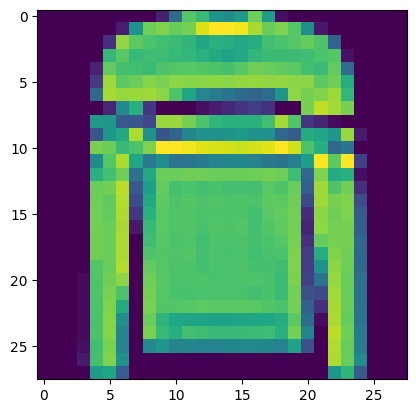

In [ ]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("X_train shape:", X_train.shape, "Y_train shape:", Y_train.shape)

# Define the labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5

# y_train contains the lables, ranging from 0 to 9
label_index = Y_train[img_index]

# Print the label, for example 2 Pullover
print ("Y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))

# # Show one of the images from the training dataset
plt.imshow(X_train[img_index])

In [ ]:
print(X_train_mlp.shape)

(60000, 784)


In [ ]:
X_train_mlp[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
X_train_mlp = X_train_mlp.astype('float32')
X_test_mlp = X_test_mlp.astype('float32')
X_train_mlp /= 255
X_test_mlp /= 255

In [ ]:
X_train_mlp[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# Convert class vectors to binary class matrices
num_classes = 10

Y_train_mlp = keras.utils.to_categorical(Y_train_mlp_1, num_classes)

Y_test_mlp = keras.utils.to_categorical(Y_test_mlp_1, num_classes)

In [ ]:
Y_train_mlp[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# Split data to optimize classifier during training
X_train_mlp, X_val_mlp, Y_train_mlp, Y_val_mlp = train_test_split(X_train_mlp,
                                                                  Y_train_mlp,
                                                                  test_size=0.2)

In [ ]:
print(X_train_mlp.shape)
print(X_val_mlp.shape)

(48000, 784)
(12000, 784)


#**Multi Layer Perceptron**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
#from keras.utils import np_utils

In [ ]:
batch_size = 256
num_epochs = 50

In [ ]:
# Multilayer Perceptron model

model = Sequential()

model.add(Dense(input_dim=784, activation='sigmoid', units=625, kernel_initializer='normal'))

model.add(Dense(input_dim=625, activation='softmax', units=10, kernel_initializer='normal'))

model.compile(optimizer=SGD(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 625)                 │         490,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           6,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 496,885 (1.90 MB)

 Trainable params: 496,885 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_mlp, Y_train_mlp,
          batch_size = batch_size,
          epochs = num_epochs,
          verbose = 1,
          validation_data = (X_val_mlp, Y_val_mlp))

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4904 - loss: 1.7453 - val_accuracy: 0.7308 - val_loss: 0.9868
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7297 - loss: 0.9158 - val_accuracy: 0.7504 - val_loss: 0.7794
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7498 - loss: 0.7624 - val_accuracy: 0.7647 - val_loss: 0.6962
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7712 - loss: 0.6799 - val_accuracy: 0.7772 - val_loss: 0.6492
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7822 - loss: 0.6387 - val_accuracy: 0.7845 - val_loss: 0.6169
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7887 - loss: 0.6093 - val_accuracy: 0.7893 - val_loss: 0.5972
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7963 - loss: 0.5890 - val_accuracy: 0.7965 - val_loss: 0.5779
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8053 - loss: 0.5646 - val_accuracy: 0.

In [ ]:
score = model.evaluate(X_test_mlp, Y_test_mlp, verbose = 1)
print()
print('MLP Test loss:', score[0])
print('MLP Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8385 - loss: 0.4481

MLP Test loss: 0.4521162509918213
MLP Test accuracy: 0.8359000086784363


#**Deep Multi Layer Perceptron**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
#from keras.utils import np_utils

In [ ]:
# Deep Multilayer Perceptron model
model_deepmlp = Sequential()

model_deepmlp.add(Dense(input_dim=784, units=625, kernel_initializer='normal'))
model_deepmlp.add(Activation('relu'))
model_deepmlp.add(Dropout(0.2))

model_deepmlp.add(Dense(input_dim=625, units=625, kernel_initializer='normal'))
model_deepmlp.add(Activation('relu'))
model_deepmlp.add(Dropout(0.2))

model_deepmlp.add(Dense(input_dim=625, units=625, kernel_initializer='normal'))
model_deepmlp.add(Activation('relu'))
model_deepmlp.add(Dropout(0.2))

model_deepmlp.add(Dense(input_dim=625, units=10, kernel_initializer='normal'))
model_deepmlp.add(Activation('softmax'))

model_deepmlp.compile(optimizer=RMSprop(learning_rate=0.001, rho=0.9),
                      loss='categorical_crossentropy', metrics=['accuracy'])

model_deepmlp.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 625)                 │         490,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 625)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 625)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 625)                 │         391,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 625)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 625)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 625)                 │         391,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 625)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 625)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           6,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,279,385 (4.88 MB)

 Trainable params: 1,279,385 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_deepmlp = model_deepmlp.fit(X_train_mlp, Y_train_mlp,
                                    batch_size = batch_size,
                                    epochs = num_epochs,
                                    verbose = 1,
                                    validation_data = (X_val_mlp, Y_val_mlp))

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6543 - loss: 0.9767 - val_accuracy: 0.8077 - val_loss: 0.5255
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8258 - loss: 0.4767 - val_accuracy: 0.7432 - val_loss: 0.5818
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8408 - loss: 0.4234 - val_accuracy: 0.8478 - val_loss: 0.4167
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8601 - loss: 0.3773 - val_accuracy: 0.8633 - val_loss: 0.3884
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8691 - loss: 0.3582 - val_accuracy: 0.8647 - val_loss: 0.3609
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8783 - loss: 0.3293 - val_accuracy: 0.8654 - val_loss: 0.3672
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8787 - loss: 0.3197 - val_accuracy: 0.8652 - val_loss: 0.3539
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8855 - loss: 0.3038 - val_accuracy: 0

In [ ]:
score = model_deepmlp.evaluate(X_test_mlp, Y_test_mlp, verbose = 1)
print()
print('Deep MLP Test loss:', score[0])
print('Deep MLP Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8827 - loss: 0.4342

Deep MLP Test loss: 0.4492104947566986
Deep MLP Test accuracy: 0.8817999958992004
